# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<div class="span5 alert alert-info">
<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****
</div>

In [81]:
import pandas as pd

df = pd.read_csv('data/human_body_temperature.csv')

# Question 1 and 2

In [82]:
# Your work here.
df.head() 
# let's just generate the first five row to see what the dataset is all about
# So the variables are temperatures, gender and heart rate

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [83]:
df.count()
# Count the number of rows for each variables and its data types

temperature    130
gender         130
heart_rate     130
dtype: int64

In [84]:
df.info()
# Ensure no data is missing

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
temperature    130 non-null float64
gender         130 non-null object
heart_rate     130 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB


# Qn 1. To find out whether the body temperature data is giving out a normal distribution.

In [85]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

(array([  4.,   6.,  15.,  26.,  30.,  30.,  15.,   1.,   2.,   1.]),
 array([  96.3 ,   96.75,   97.2 ,   97.65,   98.1 ,   98.55,   99.  ,
          99.45,   99.9 ,  100.35,  100.8 ]),
 <a list of 10 Patch objects>)

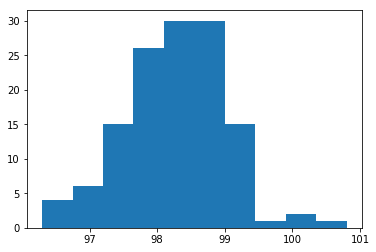

In [86]:
# A histogram can be plotted to depict the distribution
bodytemp= df.temperature.sort_values()
plt.hist(df.temperature)

In [87]:
# the observation has to be done in a probability distribution function

In [89]:
plot_val= np.arange(start=bodytemp.min(), stop= bodytemp.max(), step=0.05)
mn, std, md = bodytemp.mean(), bodytemp.std(), bodytemp.mode().values[0]

In [90]:
from scipy.stats import norm
import scipy.stats
import math

pvalue =norm.pdf(bodytemp, mn, std)


The mean, mode and standard deviation of the Body Temp are 98.2492307692, 98.0, 0.733183158039 respectively


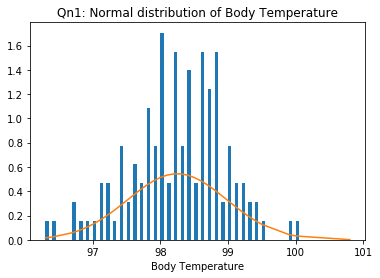

In [91]:
plt.xlabel('Body Temperature')
plt.title('Qn1: Normal distribution of Body Temperature')
n,bins,patches = plt.hist(bodytemp, bins =plot_val,normed =True, stacked =True)
plt.plot(bodytemp, pvalue)
print('The mean, mode and standard deviation of the Body Temp are ' + format(str(mn)) + ', '+ format(str(md))+', '+
      format(str(std)) + ' respectively')  

In [92]:
k2, pvalue = scipy.stats.normaltest(bodytemp)
print(graph)

0.258747986349


# When the curve is compared with the histogram, the bell shaped curve produced a p value of 0.25 for a sample quantity of  130 . It can be said that the dataset follow a Normal distribution. For a sample size large than 30 and the normal distribution not skewed, it can considered that the sample is large and the observations of a human's body temperature are independent of its population.

# Question 3.

In [109]:

df.temperature.describe()
#finding the statistical observation of the data require variables such as the sample mean and population variance
#since the pop variance is unknown, a t- test would be the viable option

count    130.000000
mean      98.249231
std        0.733183
min       96.300000
25%       97.800000
50%       98.300000
75%       98.700000
max      100.800000
Name: temperature, dtype: float64

In [111]:
scipy.stats.ttest_1samp(df.temperature, 98.6)
#1 sample testing is used to as the female and male category is not two groups in this testing.

Ttest_1sampResult(statistic=-5.4548232923645195, pvalue=2.4106320415561276e-07)

In [116]:
#trying the z test to compare results, the test would work as size is greater than 30

ztest= (df.temperature.mean() - 98.6)/(df.temperature.std()/(np.sqrt(130)))
print(ztest)

-5.45482329236


# Though the z test appear smaller than the t test, the qualitative results is similar. 

# Question 4 

In [119]:
# to find the upper and lower limits of a testing, we can calculate the confidence interval
mean, sigma = bodytemp.mean(),bodytemp.std()
mean-(1.980*(sigma/math.sqrt(130))),mean +(1.980*sigma/math.sqrt(130))
# Check the above calc using scipy.stats.norm.interval method
scipy.stats.norm.interval(0.95,mean,sigma)


(96.812218185403097, 99.68624335305843)

# Question 5

In [146]:
#Since now the gender is put in category for the respective temperature, we can apply two sample t test computation.
male_temp=df[df.gender == "M"]
df_maletemp= male_temp.temperature
df_maletemp.describe()

count    65.000000
mean     98.104615
std       0.698756
min      96.300000
25%      97.600000
50%      98.100000
75%      98.600000
max      99.500000
Name: temperature, dtype: float64

In [147]:
female_temp=df[df.gender == "F"]
df_femaletemp=female_temp.temperature
df_femaletemp.describe()

count     65.000000
mean      98.393846
std        0.743488
min       96.400000
25%       98.000000
50%       98.400000
75%       98.800000
max      100.800000
Name: temperature, dtype: float64

In [150]:
#Both male and female temperature mean is below the population mean, we have to calculate two sample t test
scipy.stats.ttest_ind(df_maletemp, df_femaletemp, equal_var = False)

Ttest_indResult(statistic=-2.2854345381656112, pvalue=0.023938264182934196)

In [151]:
#Finding the critical t is also essential to the two sample t test with the population mean of 98.6
critt = scipy.stats.t.ppf(0.975, len(df.temperature) - 1)
interval = critt*df.temperature.std()*np.sqrt((1 + 1/(len(df.temperature))))
[98.6 - interval, 98.6 + interval]

[97.14937916509497, 100.05062083490502]

# At a categorized observation of temperature by gender, the range is slightly larger than that of it combined, this result proves that individually the temperature of female and male has separate requirements for measuring their respective temperature. Therefore, it can be recommended to the metrology that the thermometer used in the clinic/hospital should be calibrated based on gender.